In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1) Importar la información

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Parcial 1 M-S/foodNutrition.csv')

# 2) Primer vistazo a la información

Mostramos las primeras 5 filas de los datos

In [ ]:
df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


Mostramos la información del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

Identificamos cuantas columnas y filas tiene nuestro dataset

In [ ]:
df.shape

(7413, 48)

#3) Buscamos si existe información faltante

In [ ]:
df_null = df.isnull().mean() * 100
df_null

Category                                                    0.000000
Description                                                 0.000000
Nutrient Data Bank Number                                   0.000000
Data.Alpha Carotene                                         0.000000
Data.Ash                                                    0.000000
Data.Beta Carotene                                          0.000000
Data.Beta Cryptoxanthin                                     0.000000
Data.Carbohydrate                                           0.000000
Data.Cholesterol                                            0.000000
Data.Choline                                                0.000000
Data.Fiber                                                  0.000000
Data.Kilocalories                                           0.000000
Data.Lutein and Zeaxanthin                                  0.000000
Data.Lycopene                                               0.000000
Data.Manganese                    

Obtenemos la lista de columnas que contiene valores nulos

In [ ]:
df_null_col = df_null.index[df_null > 0].tolist()

Obtenemos la cantidad de registros nulos en cada columna

In [ ]:
df[df_null_col].isnull().sum()

Data.Household Weights.1st Household Weight Description     470
Data.Household Weights.2nd Household Weight Description    3100
dtype: int64

# 4) Limpieza de valores nulos y no relevantes

**Limpieza de datos no relevantes**

Después de analizar el conjunto de datos, también pudimos identificar algunas filas anómalas que contenían valores que no correspondían a ningún producto. Constatamos que estos datos se caracterizaban por tener el valor "INF" al principio del nombre de la categoría. En consecuencia, tomamos la decisión de eliminarlos.

In [ ]:
df[450:455]

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
450,INFANT FORMULA,"INFANT FORMULA,MEAD JOHNSON,ENFAMIL,LO IRON,RTF",3806,0,0.32,0,0,7.18,1,8,...,71,18,0.66,194,58,0.19,0.040,7.9,0.87,5.2
451,INFANT FORMULA,"INFANT FORMULA,MEAD JOHNSON,ENFAMIL,LO IRON,LI...",3807,0,0.60,0,0,14.31,1,17,...,142,35,1.31,394,118,0.39,0.079,15.8,1.22,10.3
452,INF FORMULA,"INF FORMULA,MEAD JOHNSON,ENFAMILLIPIL,W/IRN,PD...",3808,0,2.70,0,0,56.20,17,62,...,560,139,5.20,1550,470,1.55,0.310,62.0,6.90,41.0
453,INFANT FORMULA,"INFANT FORMULA,MEAD JOHNSON,ENFAMIL,LO IRON,PD...",3809,0,2.70,0,0,56.20,17,62,...,560,139,5.20,1550,470,1.55,0.310,62.0,6.90,41.0
454,INF FORMULA,"INF FORMULA,MEAD JOHNSON,LOFENALAC,W/ IRON,PDR...",3810,0,3.60,0,0,60.00,0,60,...,470,220,3.60,1430,429,1.43,0.290,37.0,10.60,72.0


In [ ]:
df2 = df[~df['Category'].str.startswith('INF')]
# df2.info()

Limpieza de columnas no relevantes

In [ ]:
df2 = df2.drop(
    [
      "Category",
      "Data.Household Weights.1st Household Weight Description",
      "Data.Household Weights.2nd Household Weight Description",
      "Data.Household Weights.1st Household Weight",
      "Data.Household Weights.2nd Household Weight",
      "Data.Water",
      "Nutrient Data Bank Number",
      "Data.Kilocalories"
    ],
    axis=1
    )


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7327 entries, 0 to 7412
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Description                     7327 non-null   object 
 1   Data.Alpha Carotene             7327 non-null   int64  
 2   Data.Ash                        7327 non-null   float64
 3   Data.Beta Carotene              7327 non-null   int64  
 4   Data.Beta Cryptoxanthin         7327 non-null   int64  
 5   Data.Carbohydrate               7327 non-null   float64
 6   Data.Cholesterol                7327 non-null   int64  
 7   Data.Choline                    7327 non-null   int64  
 8   Data.Fiber                      7327 non-null   float64
 9   Data.Lutein and Zeaxanthin      7327 non-null   int64  
 10  Data.Lycopene                   7327 non-null   int64  
 11  Data.Manganese                  7327 non-null   float64
 12  Data.Niacin                     73

# 5. Conversión de Datos

Al analizar todas las columnas del conjunto de datos, identificamos la necesidad de investigar su origen. Esto, debido a que es esencial para determinar si un producto es saludable o no, conocer la cantidad de gramos o porcentaje de nutrientes que se encuentran cada alimento. Lamentablemente, el conjunto de datos no proporcionaba esta información crucial. Por lo tanto, realizamos una investigación exhaustiva para encontrar la fuente del conjunto de datos y las unidades de medida utilizadas en cada columna.

**Fuente de datos: **  https://www.kaggle.com/datasets/shrutisaxena/food-nutrition-dataset?select=food.csv

Con esta información, decidimos llevar a cabo una conversión de los datos a una medida universal, en este caso, estandarizamos todos los valores en **gramos (g)**.

In [ ]:
df3 = df2
gramaje = ["","mcg","g","mcg","mcg","g","mcg","mg","g","mcg","mcg","mg","mg","mg","g","%","mcg","mg","mcg","g","mg","g","g","g","g","mg","mg","mg","mg","mg","mg","mg","mg","mcg","mcg","mcg","mcg","mcg","mcg","mcg"]

for index, column in enumerate(df3.columns):
  if gramaje[index] == 'mcg':
    df3[column] = df3[column] / 1000000
  elif gramaje[index] == 'mg':
    df3[column] = df3[column] / 1000

df3

,Description,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,"BUTTER,WITH SALT",0.0,2.11,0.000158,0.0,0.06,0.000215,0.019,0.0,0.0,...,0.024,0.576,0.00009,0.002499,0.000684,1.700000e-07,3.000000e-09,0.0,2.320000e-06,7.000000e-06
1,"BUTTER,WHIPPED,WITH SALT",0.0,2.11,0.000158,0.0,0.06,0.000219,0.019,0.0,0.0,...,0.026,0.827,0.00005,0.002499,0.000684,1.300000e-07,3.000000e-09,0.0,2.320000e-06,7.000000e-06
2,"BUTTER OIL,ANHYDROUS",0.0,0.00,0.000193,0.0,0.00,0.000256,0.022,0.0,0.0,...,0.005,0.002,0.00001,0.003069,0.000840,1.000000e-08,1.000000e-09,0.0,2.800000e-06,8.600000e-06
3,"CHEESE,BLUE",0.0,5.11,0.000074,0.0,2.34,0.000075,0.015,0.0,0.0,...,0.256,1.395,0.00266,0.000763,0.000198,1.220000e-06,1.660000e-07,0.0,2.500000e-07,2.400000e-06
4,"CHEESE,BRICK",0.0,3.18,0.000076,0.0,2.79,0.000094,0.015,0.0,0.0,...,0.136,0.560,0.00260,0.001080,0.000292,1.260000e-06,6.500000e-08,0.0,2.600000e-07,2.500000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,"FROG LEGS,RAW",0.0,1.40,0.000000,0.0,0.00,0.000050,0.065,0.0,0.0,...,0.285,0.058,0.00100,0.000050,0.000015,4.000000e-07,1.200000e-07,0.0,1.000000e-06,1.000000e-07
7409,"MACKEREL,SALTED",0.0,13.40,0.000000,0.0,0.00,0.000095,0.095,0.0,0.0,...,0.520,4.450,0.00110,0.000157,0.000047,1.200000e-05,4.100000e-07,0.0,2.380000e-06,7.800000e-06
7410,"SCALLOP,(BAY&SEA),CKD,STMD",0.0,3.06,0.000000,0.0,0.00,0.000053,0.081,0.0,0.0,...,0.476,0.265,0.00300,0.000100,0.000030,1.300000e-06,1.000000e-07,0.0,1.500000e-06,2.000000e-07
7411,"SNAIL,RAW",0.0,1.30,0.000000,0.0,2.00,0.000050,0.065,0.0,0.0,...,0.382,0.070,0.00100,0.000100,0.000030,5.000000e-07,1.300000e-07,0.0,5.000000e-06,1.000000e-07


In [ ]:
df3.columns


Index(['Description', 'Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Lutein and Zeaxanthin',
       'Data.Lycopene', 'Data.Manganese', 'Data.Niacin',
       'Data.Pantothenic Acid', 'Data.Protein', 'Data.Refuse Percentage',
       'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium', 'Data.Sugar Total',
       'Data.Thiamin', 'Data.Fat.Monosaturated Fat',
       'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat',
       'Data.Fat.Total Lipid', 'Data.Major Minerals.Calcium',
       'Data.Major Minerals.Copper', 'Data.Major Minerals.Iron',
       'Data.Major Minerals.Magnesium', 'Data.Major Minerals.Phosphorus',
       'Data.Major Minerals.Potassium', 'Data.Major Minerals.Sodium',
       'Data.Major Minerals.Zinc', 'Data.Vitamins.Vitamin A - IU',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitam

# 5) Análisis exploratorio

In [ ]:
def grafico_dispersion(variables, data):
  fig, axes = plt.subplots(nrows=len(variables), ncols=len(variables), figsize=(20, 20))

  for i in range(len(variables)):
      for j in range(len(variables)):
          if i == j:
              axes[i, j].hist(data[variables[i]], bins=20, color='skyblue', alpha=0.7)
              axes[i, j].set_title(variables[i])
          else:
              axes[i, j].scatter(data[variables[j]], data[variables[i]], color='b', alpha=0.5)
              axes[i, j].set_xlabel(variables[j])
              axes[i, j].set_ylabel(variables[i])

  plt.tight_layout()
  plt.show()

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importante

## Carotenoides

In [ ]:
carotenoides = ['Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin', 'Data.Lutein and Zeaxanthin', 'Data.Lycopene']

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en los macronutrientes

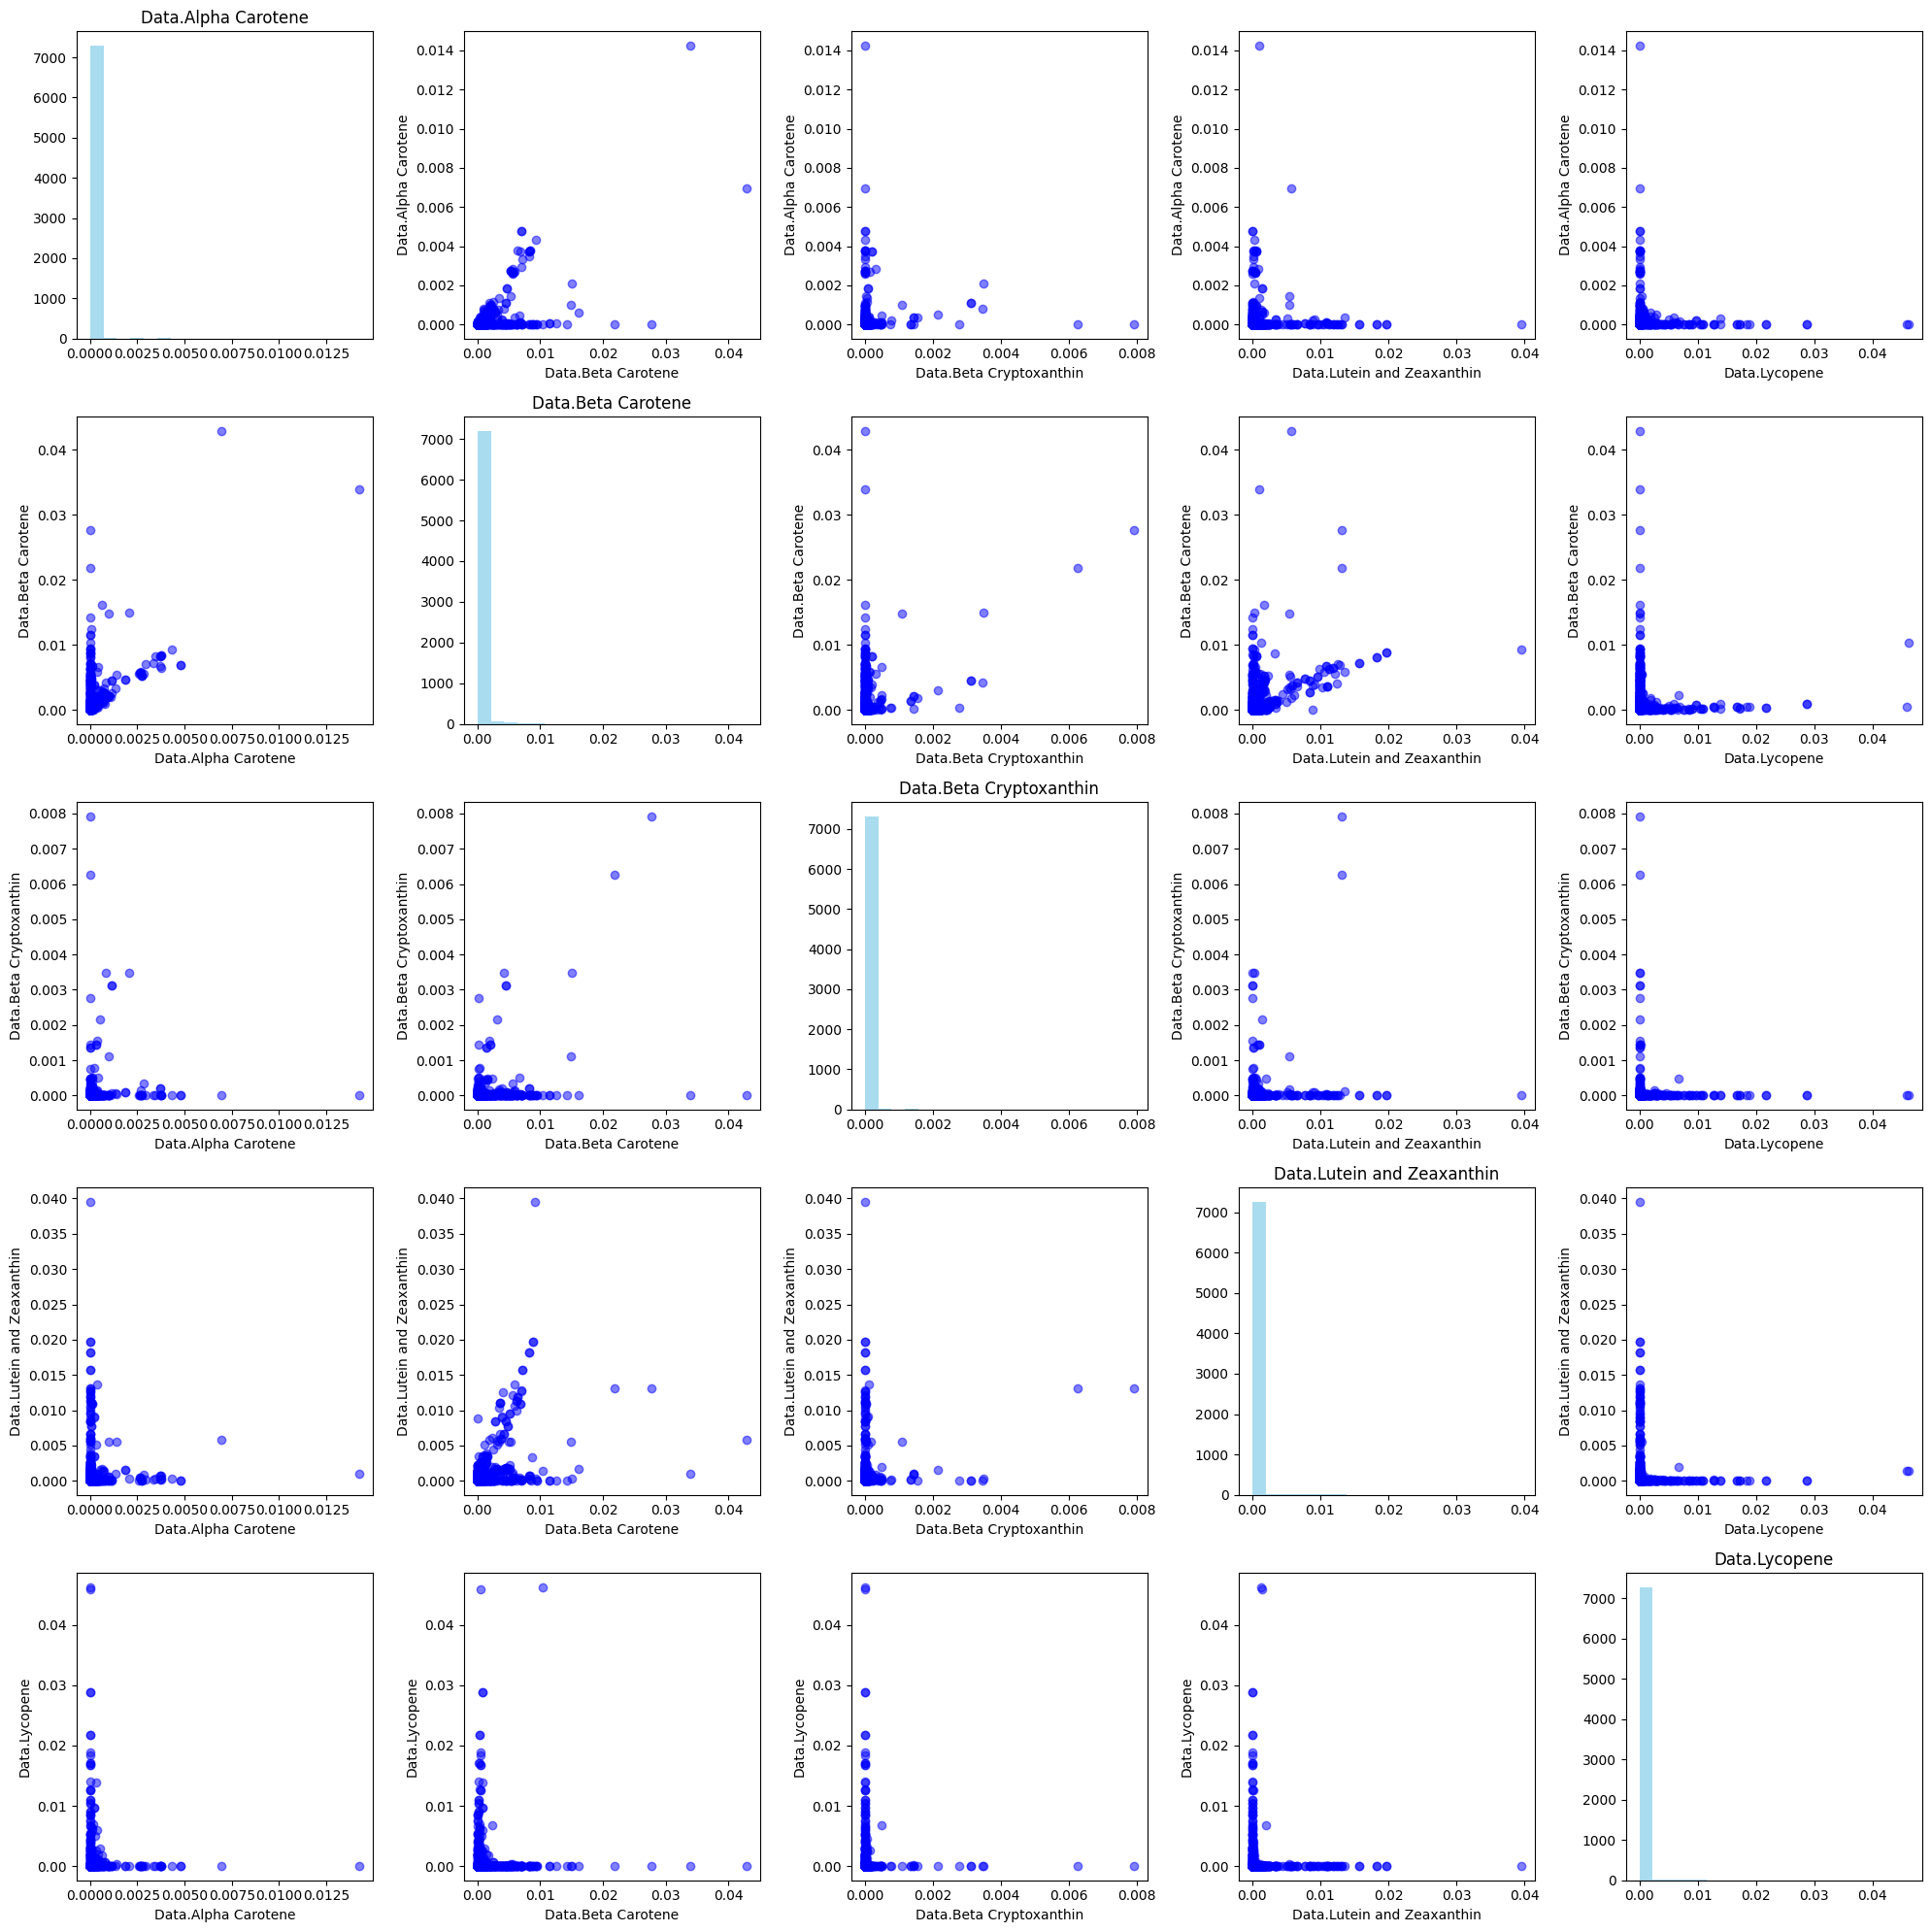

In [ ]:
grafico_dispersion(carotenoides,df3)

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en los macronutrientes

In [ ]:
df3[carotenoides].corr()

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Lutein and Zeaxanthin,Data.Lycopene
Data.Alpha Carotene,1.000000,0.631735,0.078747,0.054136,0.005475
Data.Beta Carotene,0.631735,1.000000,0.390353,0.500705,0.063601
Data.Beta Cryptoxanthin,0.078747,0.390353,1.000000,0.175233,0.000027
Data.Lutein and Zeaxanthin,0.054136,0.500705,0.175233,1.000000,0.007857
Data.Lycopene,0.005475,0.063601,0.000027,0.007857,1.000000


Luego de analizar tanto el grafico de dispersion con las tablas de correlacion de los carotenoides identificamos 3 carotenoides que presentan un alto indice de correlacion, los cuales son:


*   Data.Beta Carotene
*   Data.Alpha Carotene
*   Data.Lutein and Zeaxanthin

De acuerdo a esto decidimos que estas variables van a ser parte de los nutrientes que decidirán si un alimento es saludable o no





## Macronutrientes

In [ ]:
macronutrientes = ['Data.Protein', 'Data.Carbohydrate', 'Data.Fiber', 'Data.Sugar Total', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat']

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en los macronutrientes

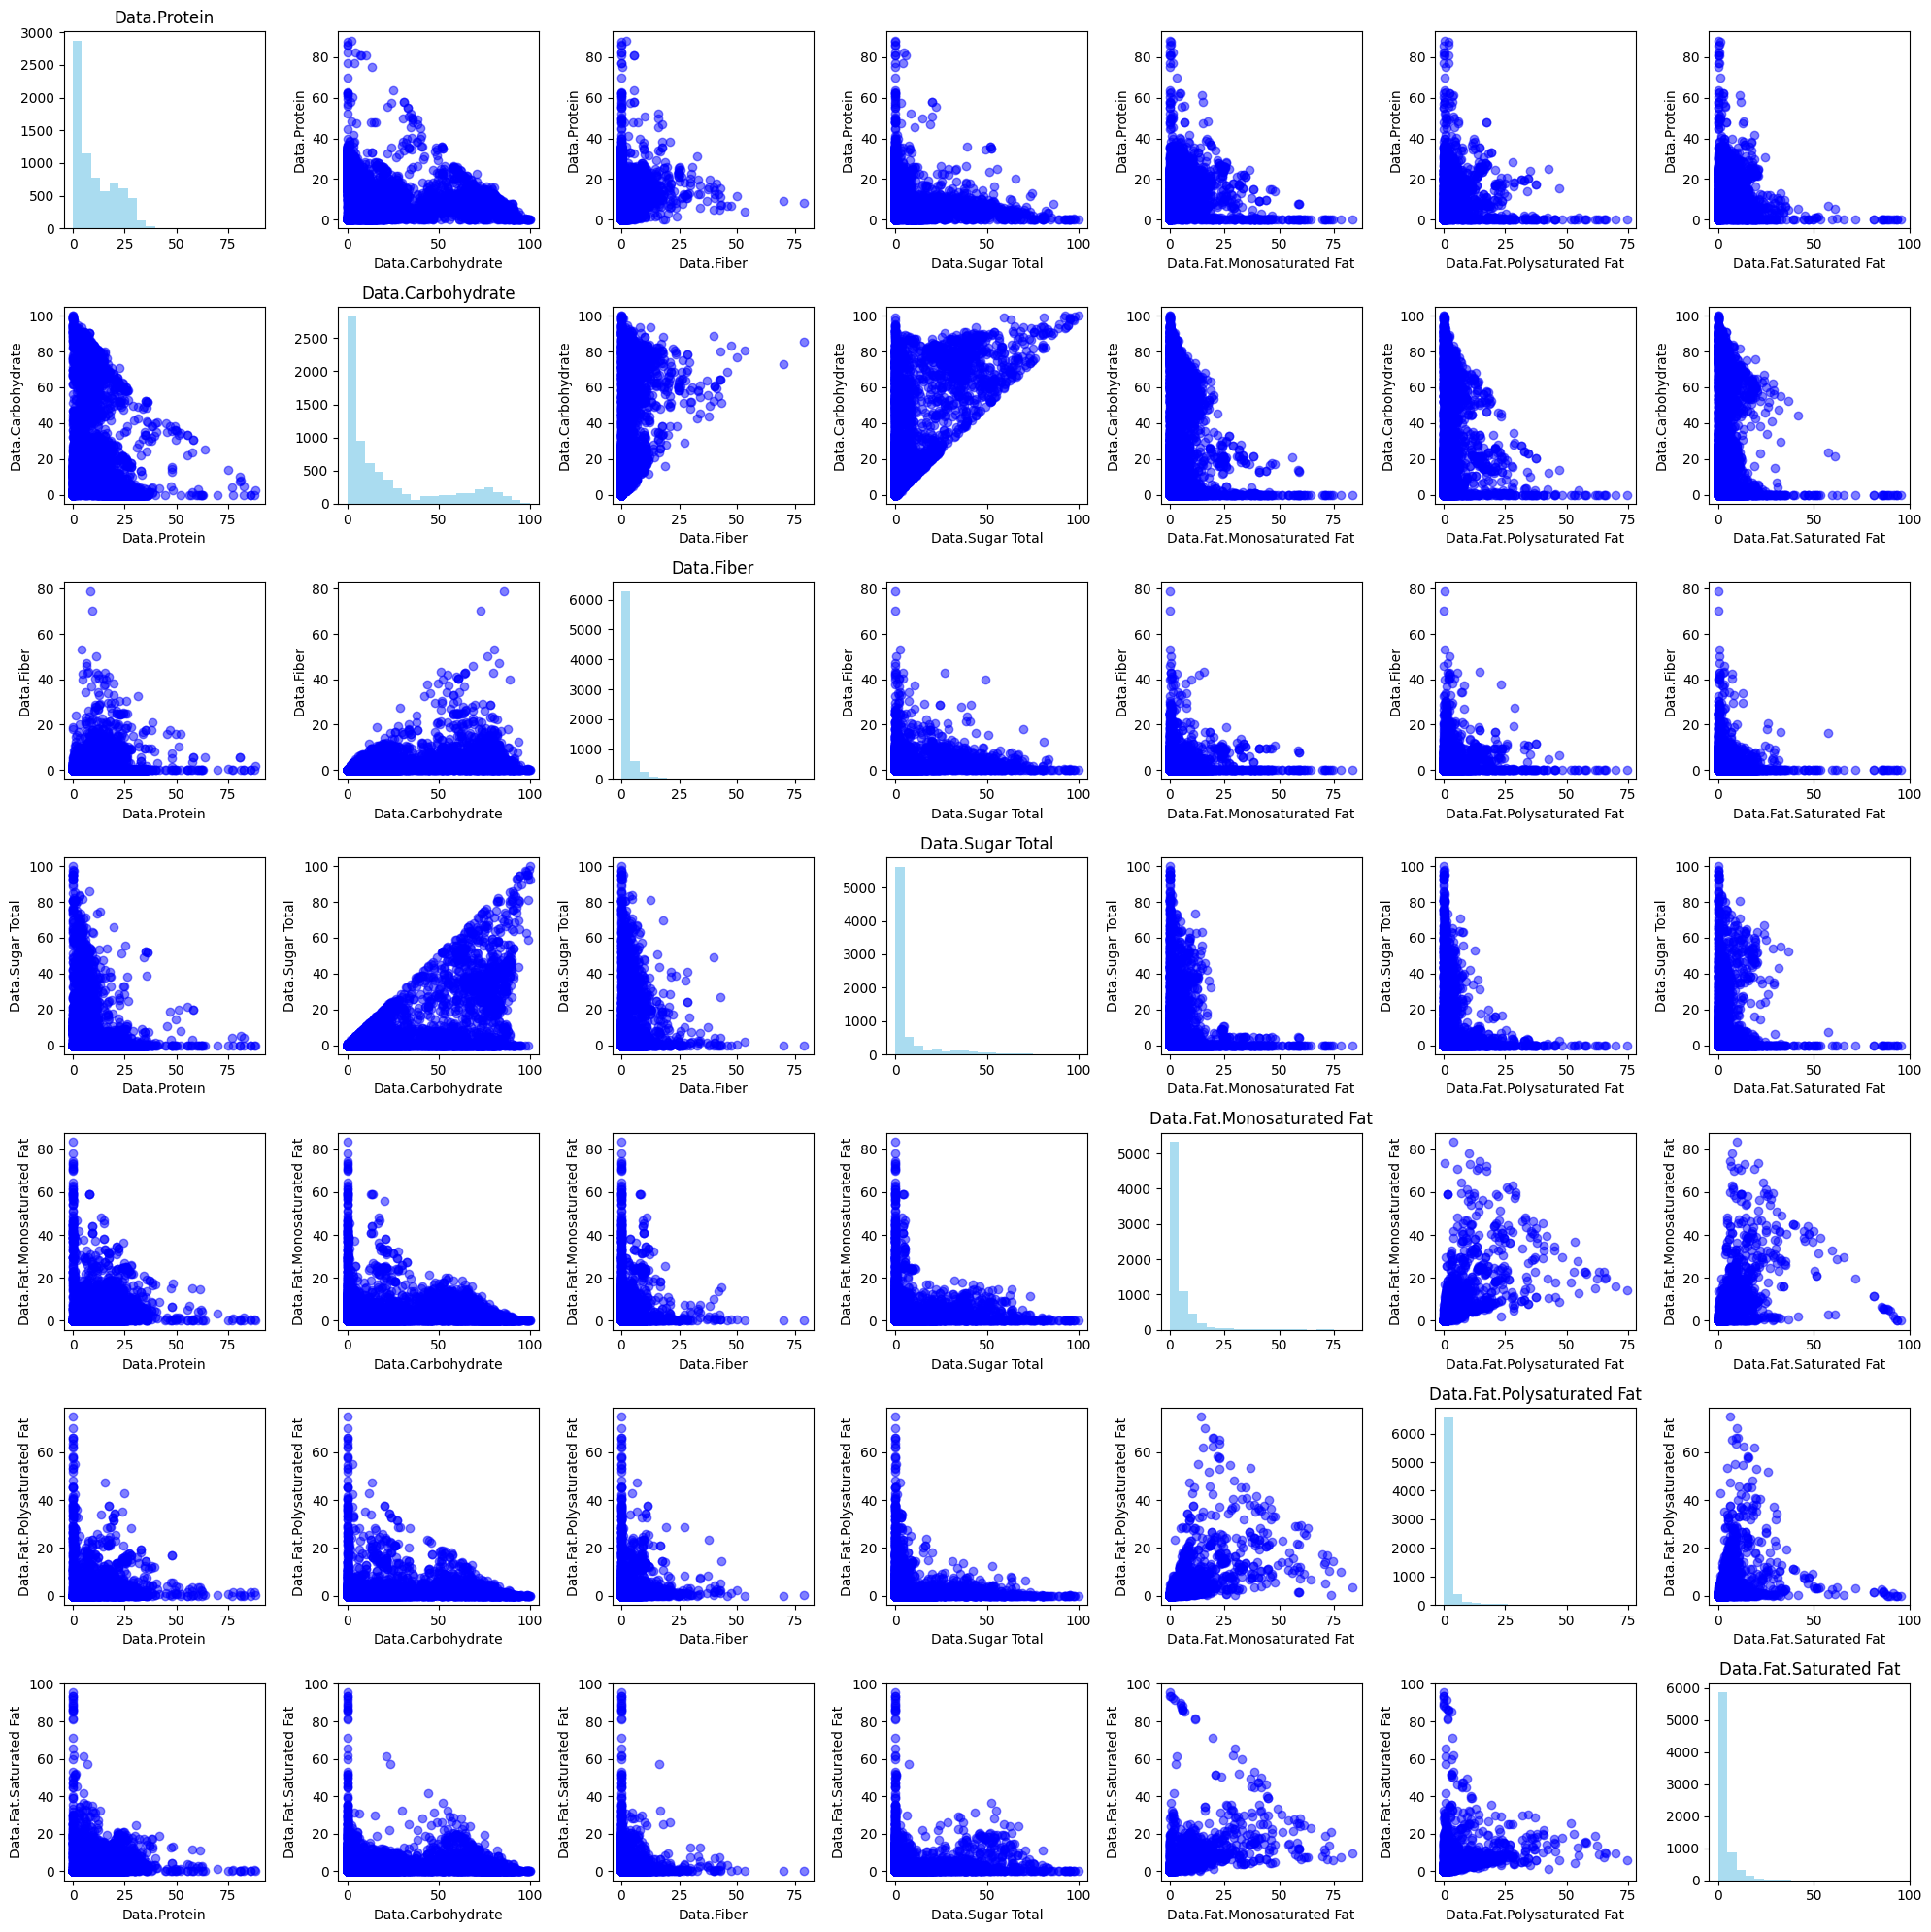

In [ ]:
grafico_dispersion(macronutrientes,df3)

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en los macronutrientes

In [ ]:
df3[macronutrientes].corr()

,Data.Protein,Data.Carbohydrate,Data.Fiber,Data.Sugar Total,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat
Data.Protein,1.000000,-0.257119,-0.036791,-0.237130,0.083076,-0.007805,0.062541
Data.Carbohydrate,-0.257119,1.000000,0.434261,0.601107,-0.112545,-0.020826,-0.092679
Data.Fiber,-0.036791,0.434261,1.000000,0.106500,-0.035971,0.063116,-0.075346
Data.Sugar Total,-0.237130,0.601107,0.106500,1.000000,-0.080298,-0.056224,0.010132
Data.Fat.Monosaturated Fat,0.083076,-0.112545,-0.035971,-0.080298,1.000000,0.597056,0.533304
Data.Fat.Polysaturated Fat,-0.007805,-0.020826,0.063116,-0.056224,0.597056,1.000000,0.275280
Data.Fat.Saturated Fat,0.062541,-0.092679,-0.075346,0.010132,0.533304,0.275280,1.000000


Luego de analizar tanto el grafico de dispersion con las tablas de correlacion de los macronutrientes identificamos 3 nutrientes que presentan un alto indice de correlacion, los cuales son:


*   Data.Fat.Monosaturated Fat
*   Data.Fat.Polysaturated Fat
*   Data.Fat.Saturated

De acuerdo a esto decidimos que estas variables van a ser parte de los nutrientes que decidirán si un alimento es saludable o no


## Vitaminas

In [ ]:
vitaminas = ['Data.Vitamins.Vitamin A - IU', 'Data.Vitamins.Vitamin A - RAE',
       'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6',
       'Data.Vitamins.Vitamin C', 'Data.Vitamins.Vitamin E',
       'Data.Vitamins.Vitamin K']

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en las vitaminas

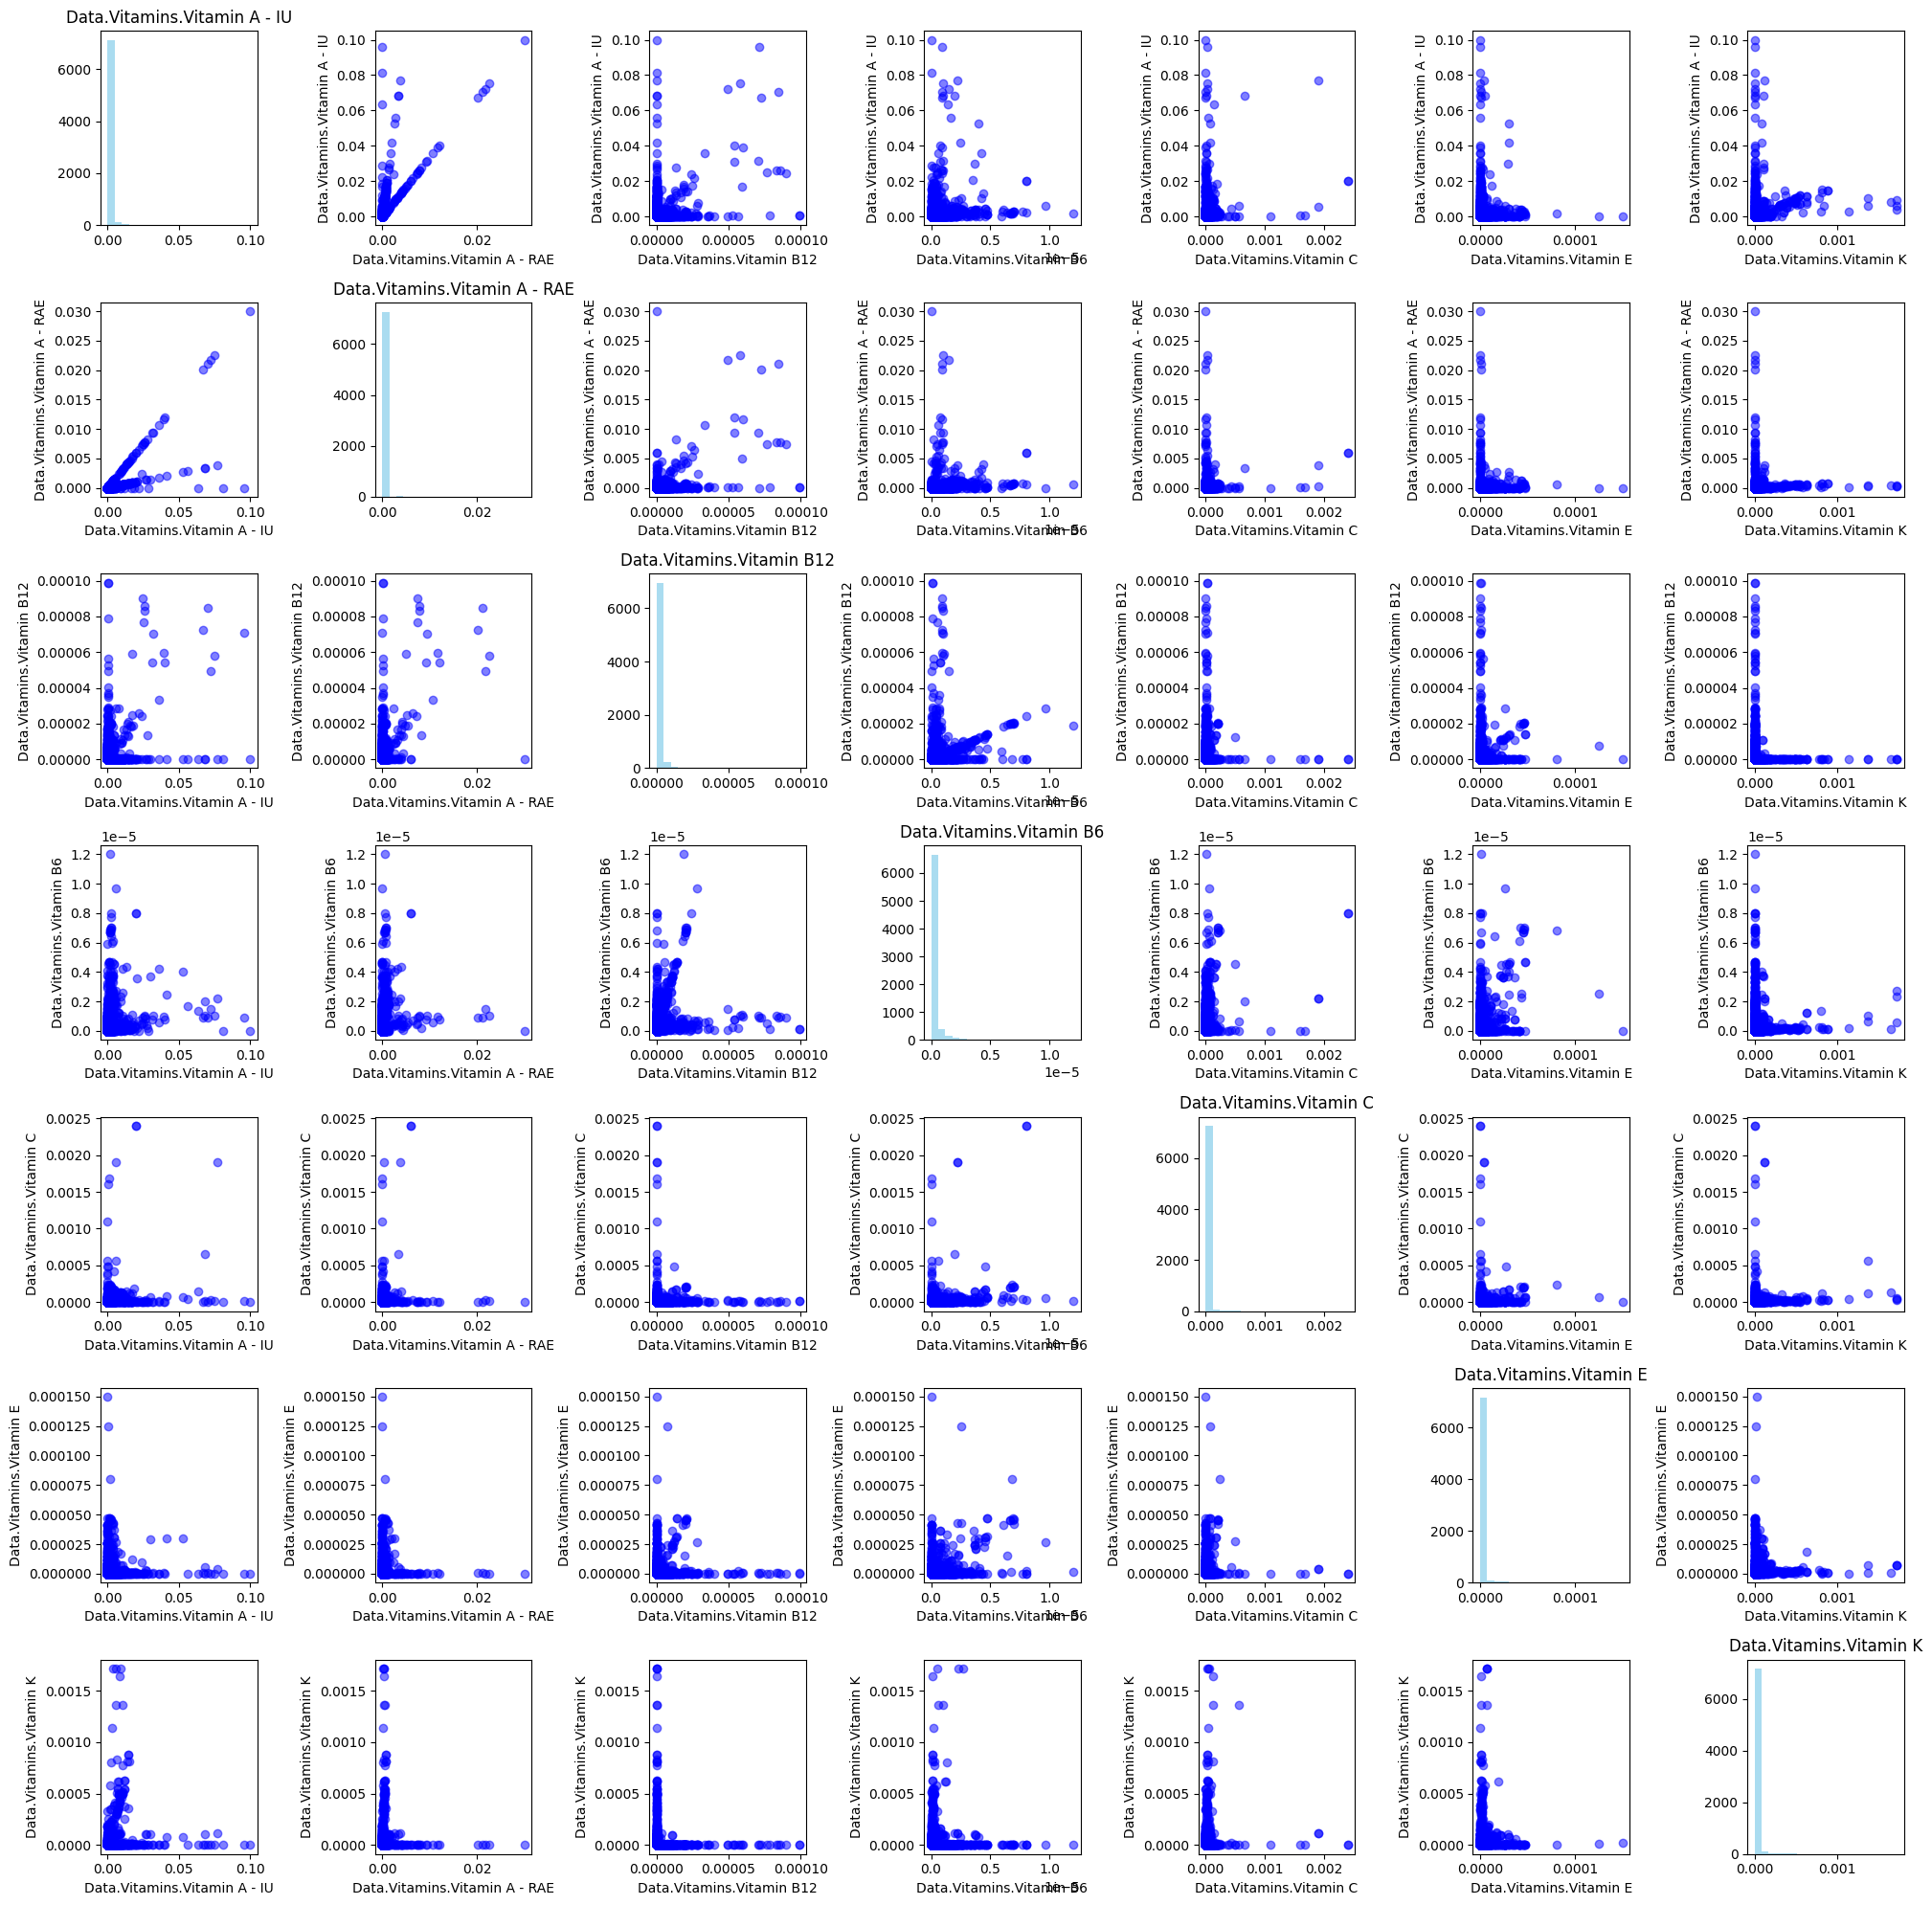

In [ ]:
grafico_dispersion(vitaminas,df3)

Correlación entre las vitaminas

In [ ]:
df3[vitaminas].corr()

,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Data.Vitamins.Vitamin A - IU,1.000000,0.729107,0.364659,0.172847,0.206096,0.060320,0.170550
Data.Vitamins.Vitamin A - RAE,0.729107,1.000000,0.504669,0.168398,0.122869,0.032262,0.039878
Data.Vitamins.Vitamin B12,0.364659,0.504669,1.000000,0.269668,0.010388,0.074663,-0.031768
Data.Vitamins.Vitamin B6,0.172847,0.168398,0.269668,1.000000,0.257107,0.321572,0.028197
Data.Vitamins.Vitamin C,0.206096,0.122869,0.010388,0.257107,1.000000,0.067733,0.082230
Data.Vitamins.Vitamin E,0.060320,0.032262,0.074663,0.321572,0.067733,1.000000,0.074217
Data.Vitamins.Vitamin K,0.170550,0.039878,-0.031768,0.028197,0.082230,0.074217,1.000000


Luego de analizar tanto el grafico de dispersion con las tablas de correlacion de los vitaminas identificamos 3 nutrientes que presentan un alto indice de correlacion, los cuales son:


*   Data.Vitamins.Vitamin B12
*   Data.Vitamins.Vitamin B6
*   Data.Vitamins.Vitamin A - RAE

De acuerdo a esto decidimos que estas variables van a ser parte de los nutrientes que decidirán si un alimento es saludable o no


## Minerales

In [ ]:
minerales = ['Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc']

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en los minerales

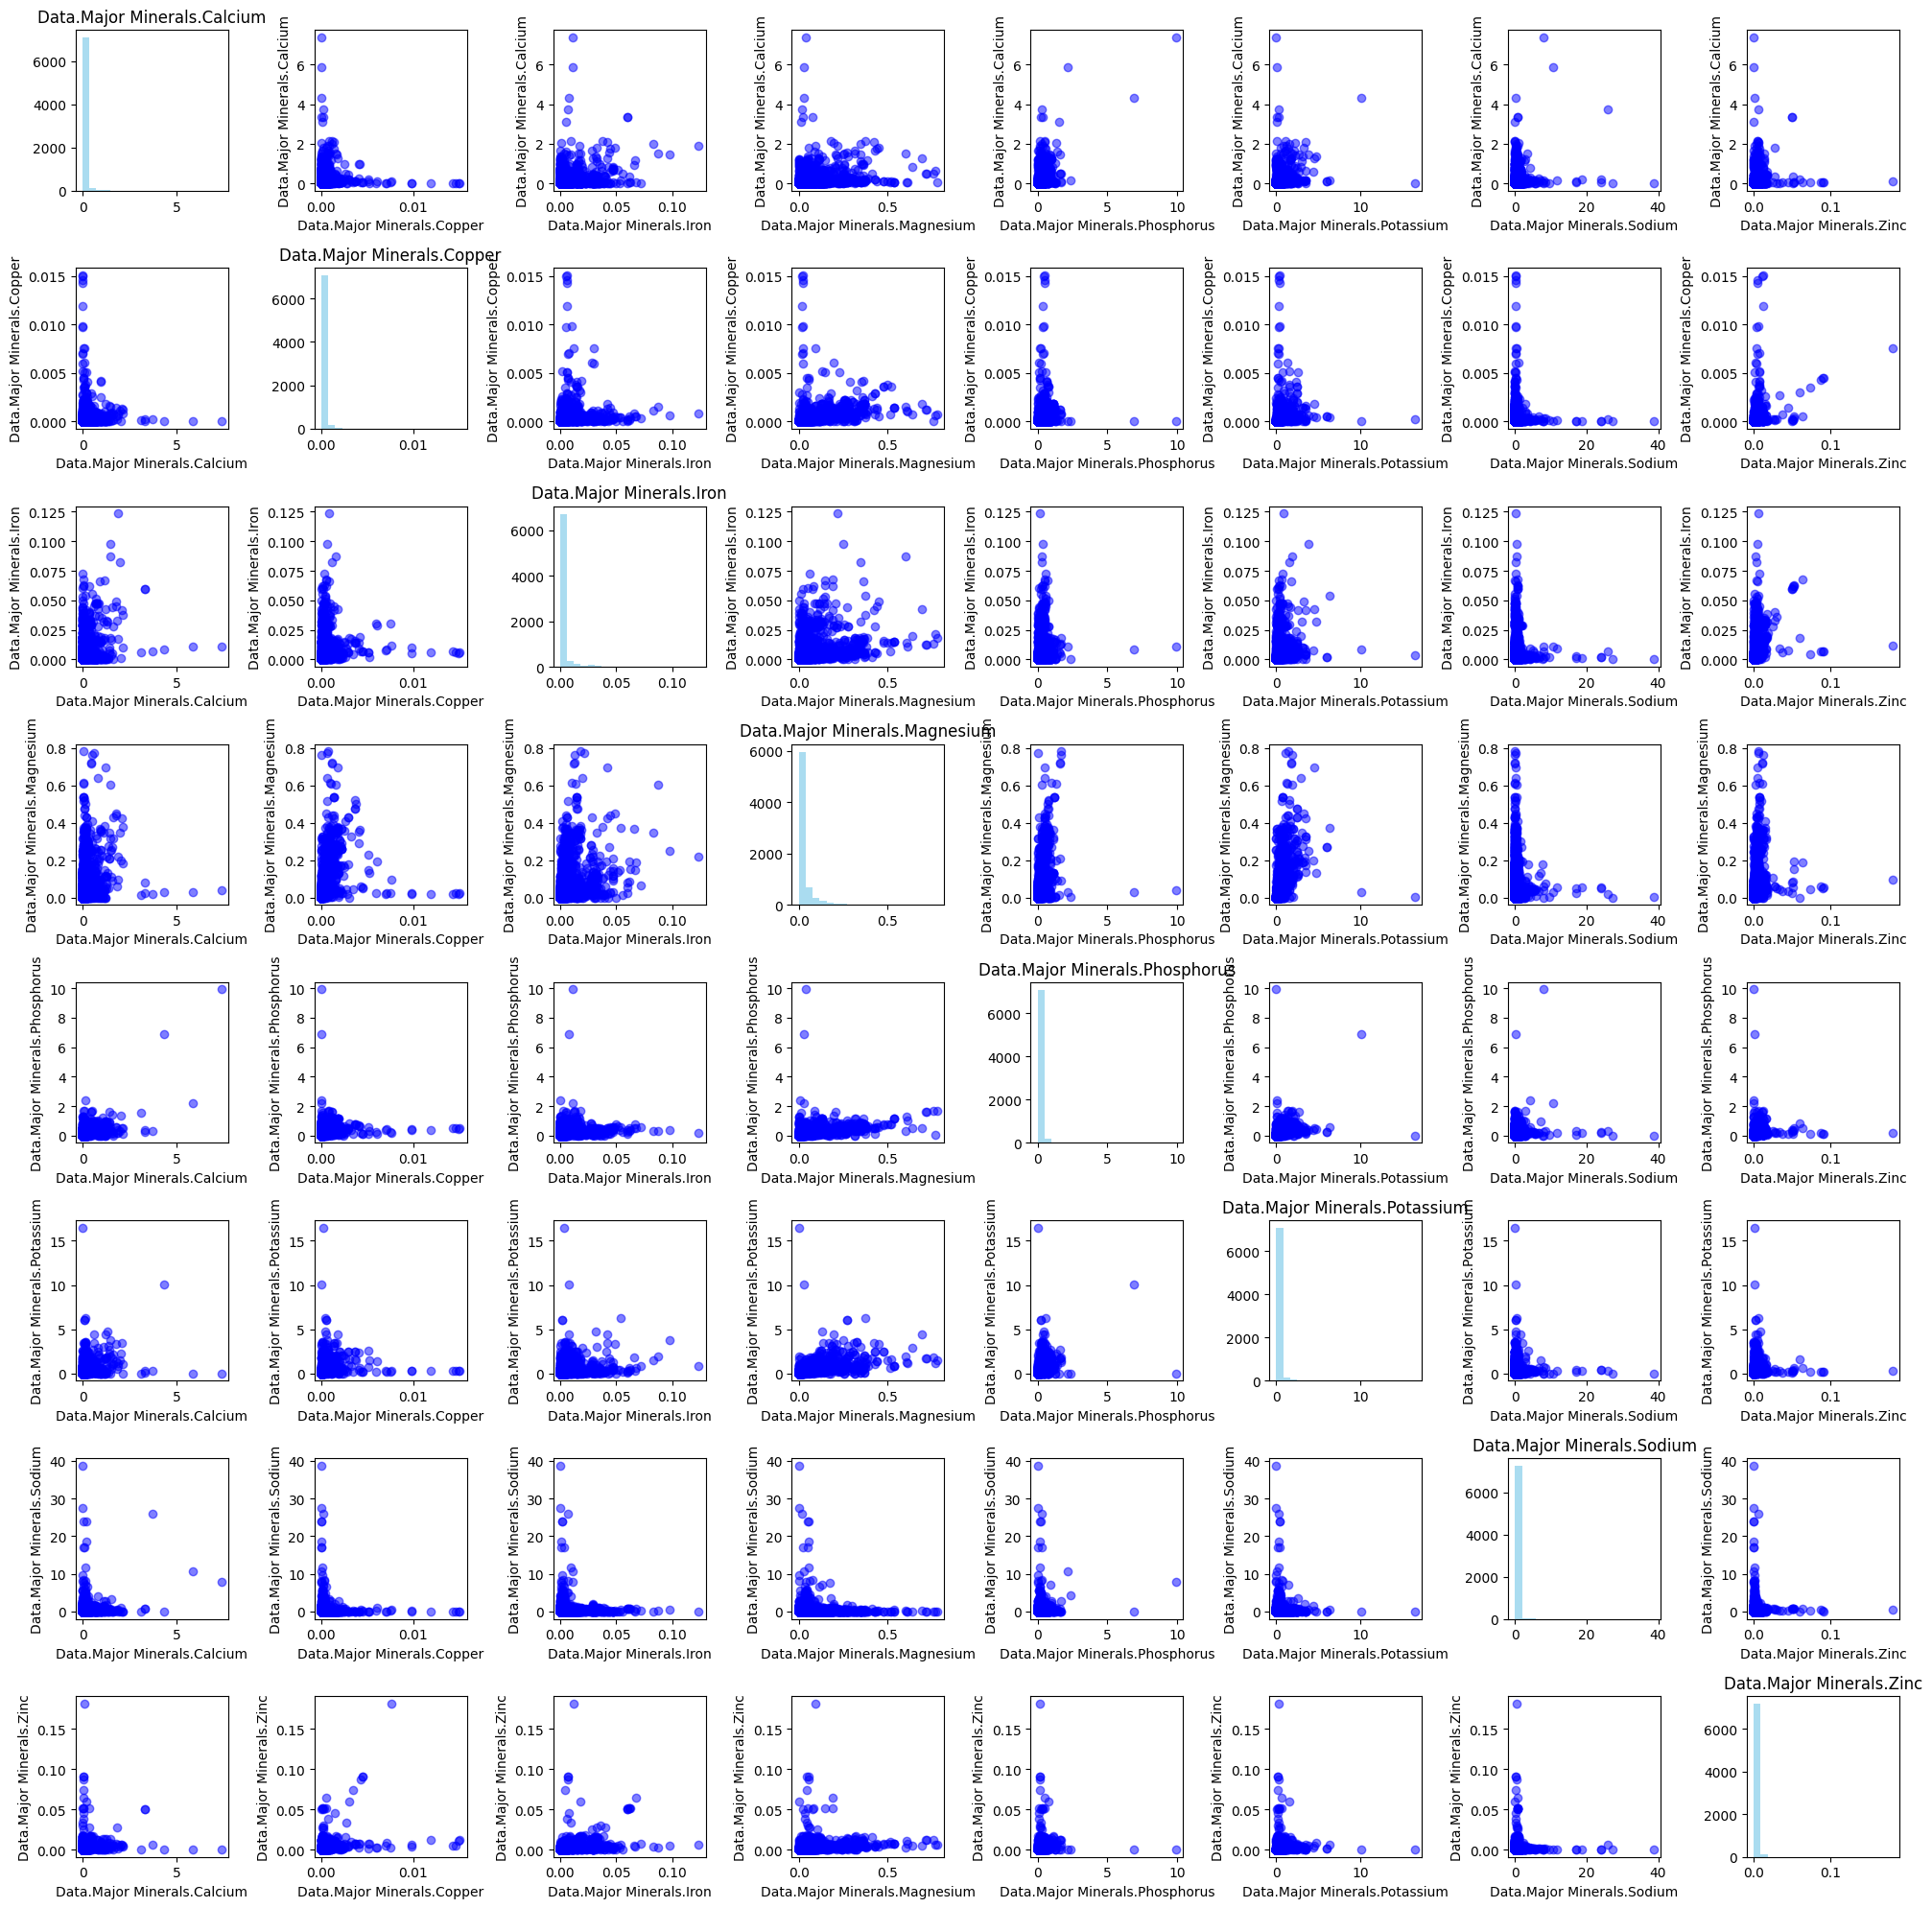

In [ ]:
grafico_dispersion(minerales, df3)

Correlación entre los minerales

In [ ]:
df3[minerales].corr()

,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
Data.Major Minerals.Calcium,1.000000,0.074673,0.340318,0.287711,0.570471,0.255153,0.179835,0.135632
Data.Major Minerals.Copper,0.074673,1.000000,0.192792,0.373026,0.225619,0.225683,-0.018196,0.311728
Data.Major Minerals.Iron,0.340318,0.192792,1.000000,0.396175,0.230654,0.237394,0.026254,0.367581
Data.Major Minerals.Magnesium,0.287711,0.373026,0.396175,1.000000,0.441297,0.519915,-0.013278,0.235429
Data.Major Minerals.Phosphorus,0.570471,0.225619,0.230654,0.441297,1.000000,0.376067,0.116609,0.217943
Data.Major Minerals.Potassium,0.255153,0.225683,0.237394,0.519915,0.376067,1.000000,-0.008664,0.117453
Data.Major Minerals.Sodium,0.179835,-0.018196,0.026254,-0.013278,0.116609,-0.008664,1.000000,-0.000645
Data.Major Minerals.Zinc,0.135632,0.311728,0.367581,0.235429,0.217943,0.117453,-0.000645,1.000000


Luego de analizar tanto el grafico de dispersion con las tablas de correlacion de los vitaminas identificamos 3 nutrientes que presentan un alto indice de correlacion, los cuales son:


*   Data.Major Minerals.Phosphorus
*   Data.Major Minerals.Potassium
*   Data.Major Minerals.Magnesium
*   Data.Major Minerals.Calcium


De acuerdo a esto decidimos que estas variables van a ser parte de los nutrientes que decidirán si un alimento es saludable o no


## Grasas

In [ ]:
grasas = ['Data.Fat.Monosaturated Fat',	'Data.Fat.Polysaturated Fat',	'Data.Fat.Saturated Fat', 'Data.Cholesterol']

Vamos en busqueda de correlaciones en nuestra información que nos permitan identificar variables importantes en las grasas

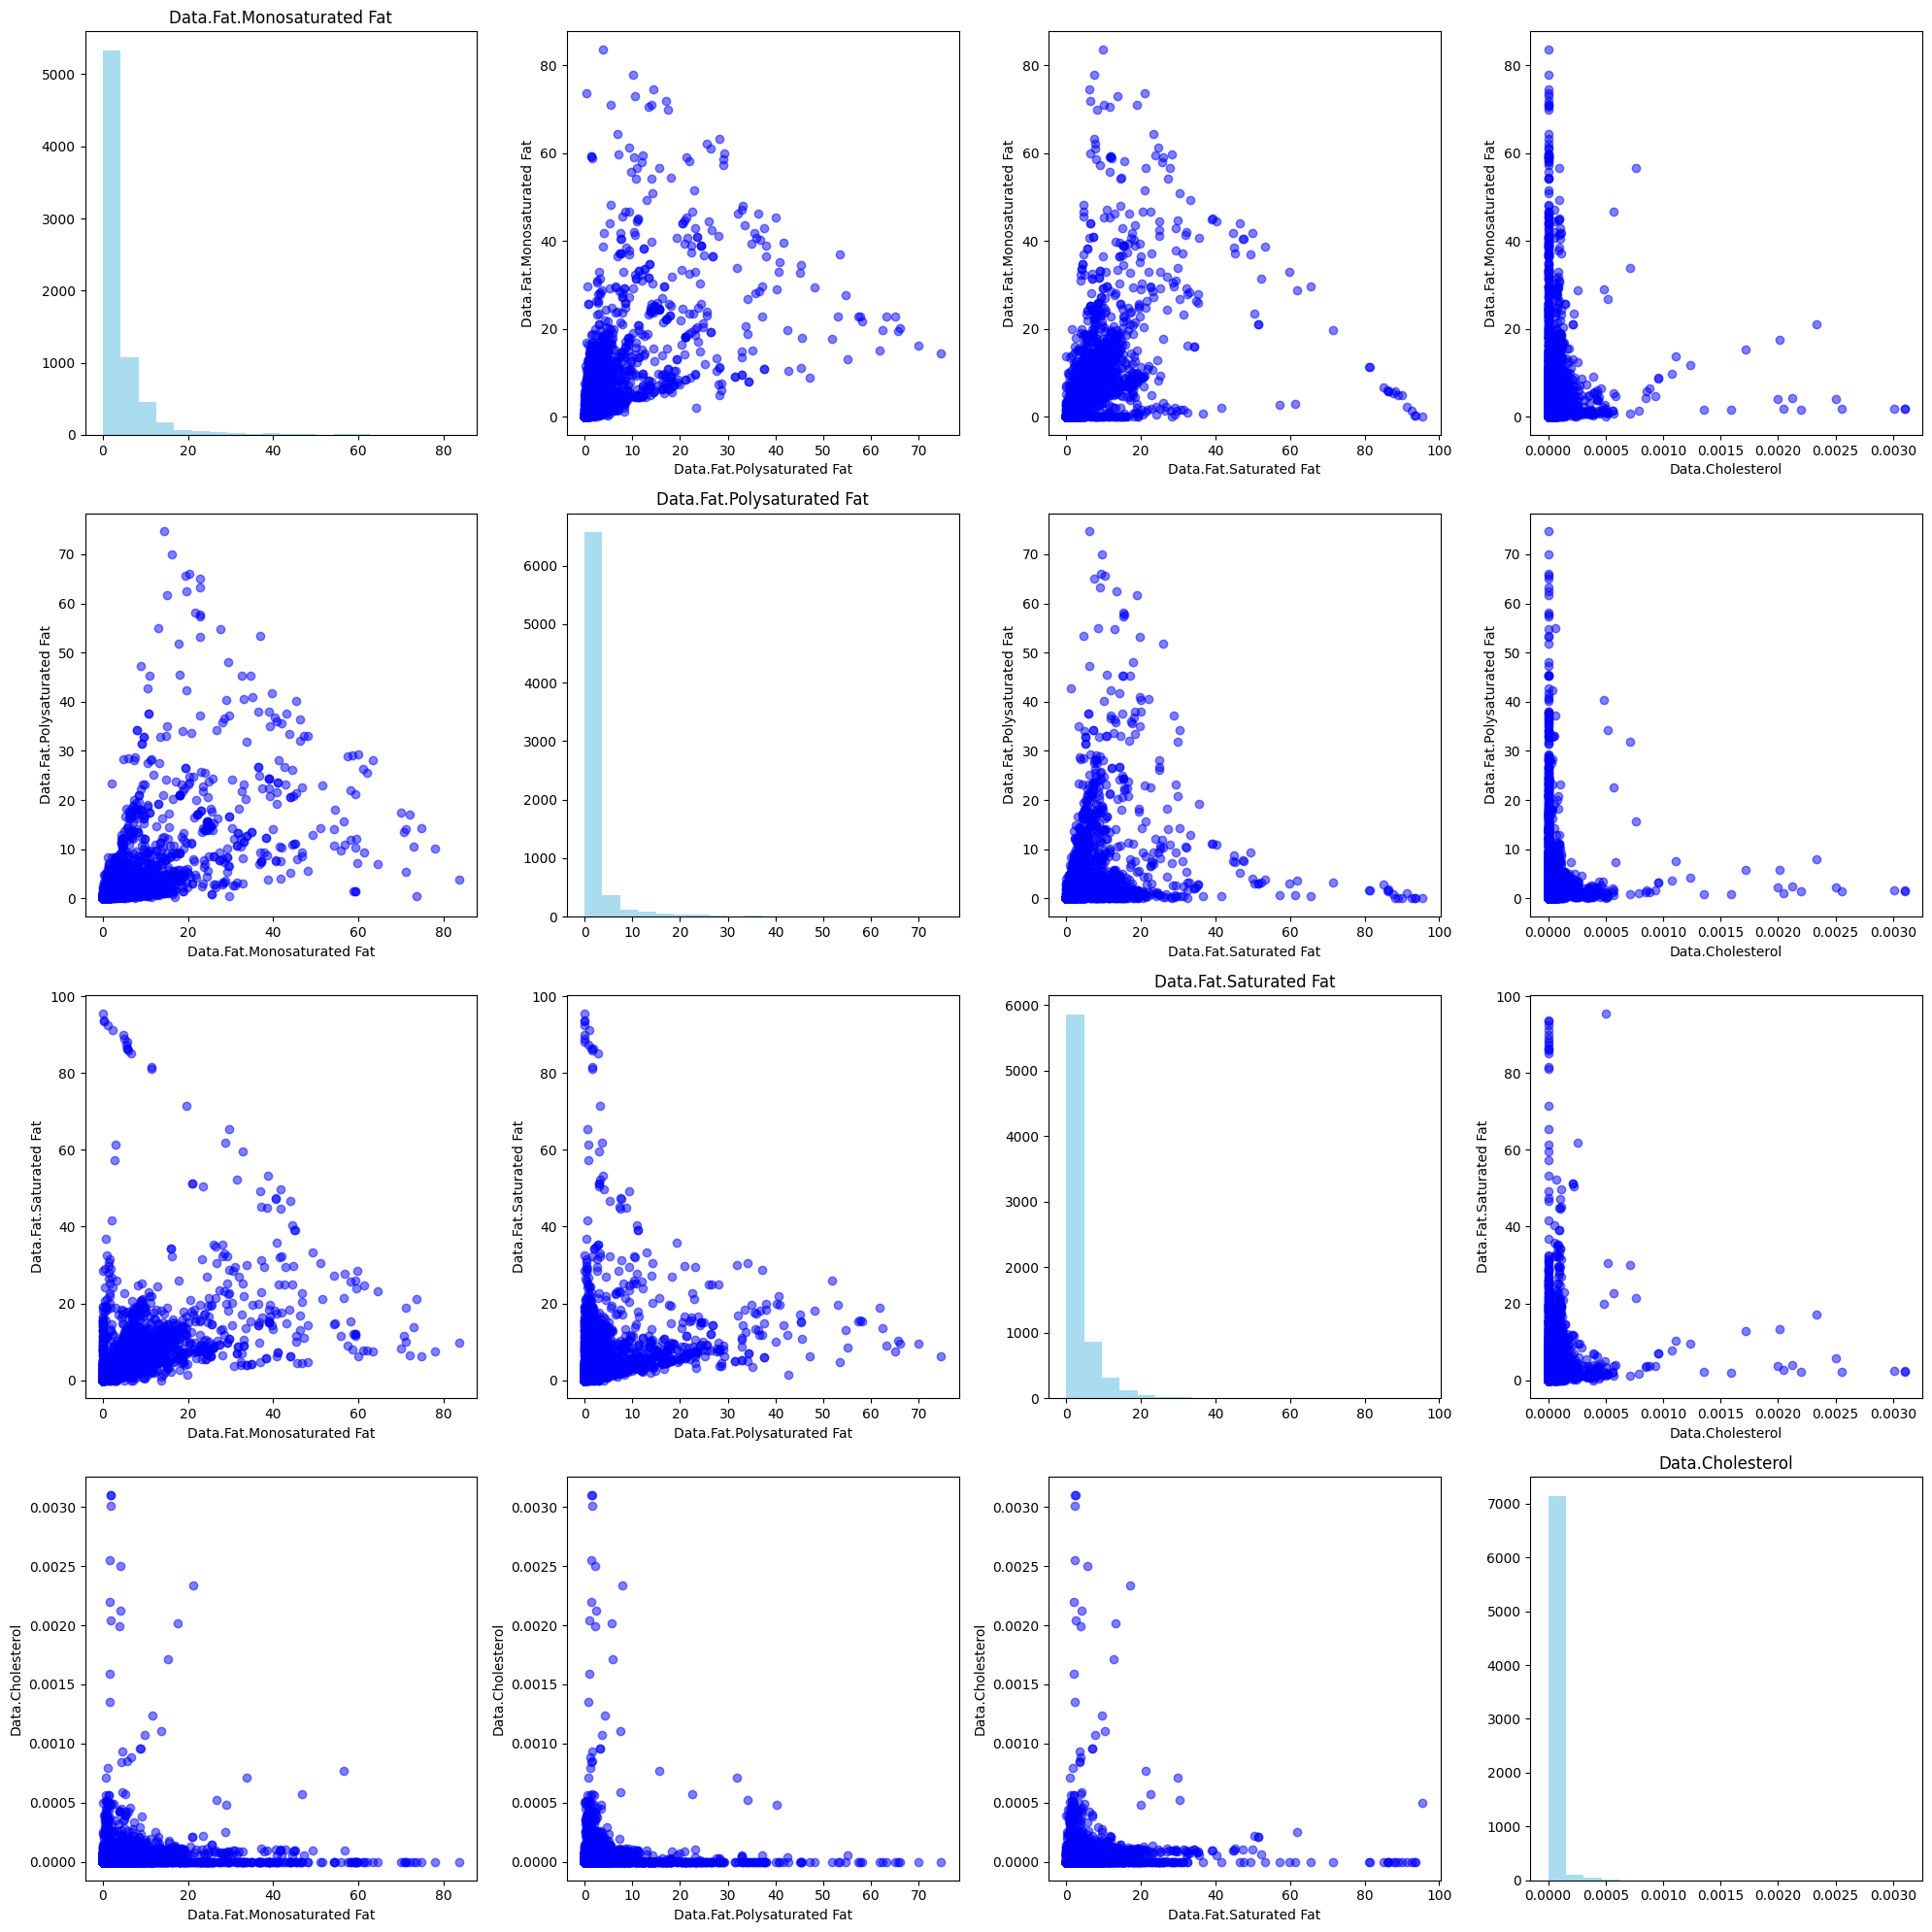

In [ ]:
grafico_dispersion(grasas, df3)

Correlacion entre las grasas

In [ ]:
df3[grasas].corr()

,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Cholesterol
Data.Fat.Monosaturated Fat,1.000000,0.597056,0.533304,0.085078
Data.Fat.Polysaturated Fat,0.597056,1.000000,0.275280,0.007254
Data.Fat.Saturated Fat,0.533304,0.275280,1.000000,0.106560
Data.Cholesterol,0.085078,0.007254,0.106560,1.000000


De acuerdo a la correlacion y la dispersion reafirmamos que existe una relacion inversamente proporsional entre grasas buenas y malaas, las cuales nos ayudarán a identificar si un producto es saludable

*   Buenas (Monosaturadas, polysaturadas)
*   Malas (Saturadas, colesterol)



# 6) Conclusión

##Criterios de Evaluación para Determinar si un Producto es Saludable
**Carotenoides**
 *  fiber > mayor
 *  carbohidratos > mayor
 *  suggar < Menor

**Macronutrientes**
*   Monosaturated Fat > Mayor
*   Polysaturated Fat > MAyor
*   Saturated Fat < Menor

**Vitaminas**
*   Vitamina B6 > Mayor
*   Vitamina B12 > Mayor
*   Vitamina A > Mayor

**Minerales**
*  Cooper > Mayor
*  Zinc > Mayor
*  Fosfor > Mayor
*  Calcio > Mayor
*  potasio > Mayor
*  magnesio > Mayor


Histograma para determinar los valores que definiran sin un producto es saludable o no

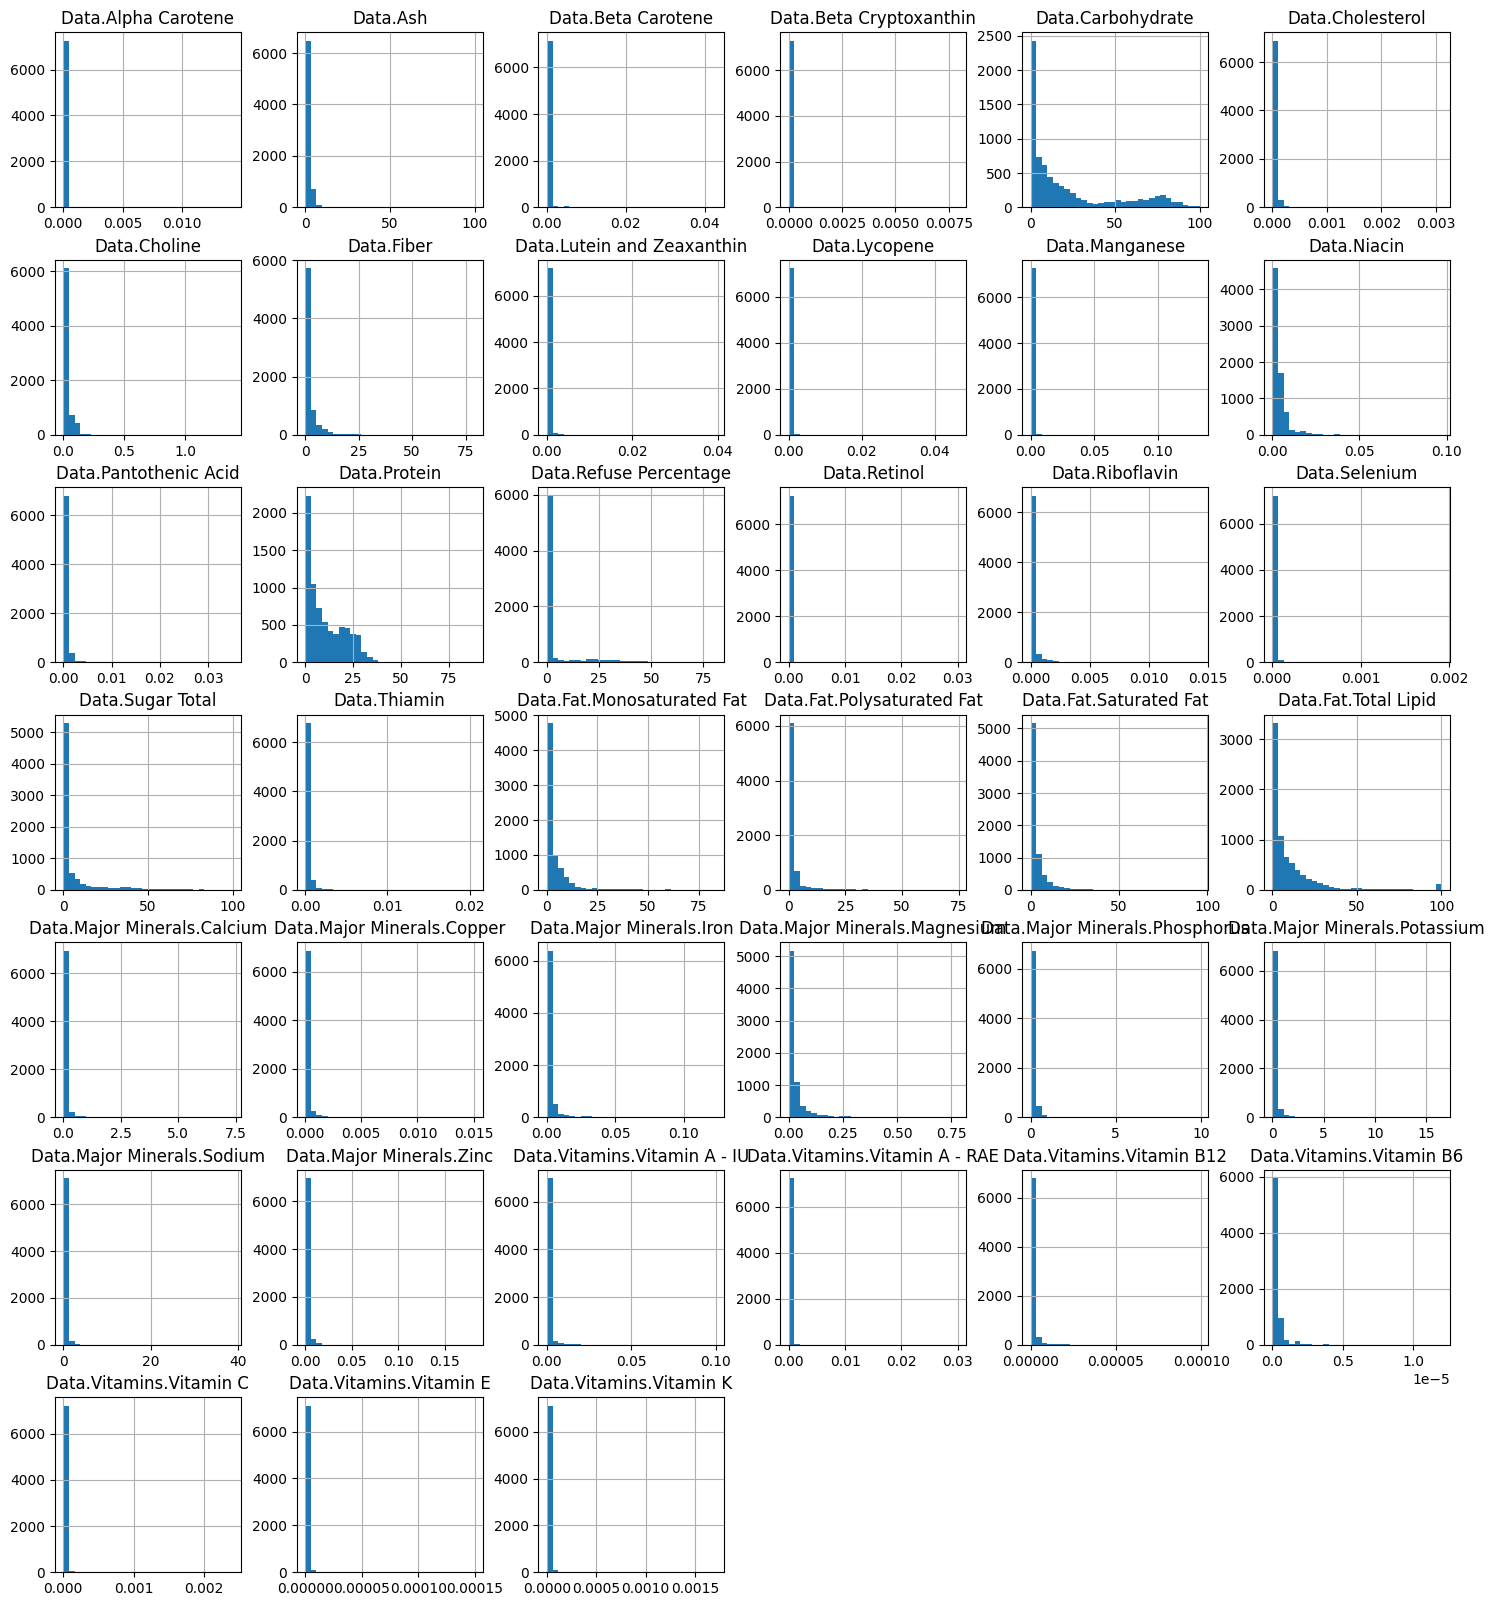

In [ ]:
df3.hist(figsize=(18,20), bins=30)
plt.show()

Como la mayoria de productos se encuentran en las diferentes categorias en los mismos rangos, se definiron ciertas categorias con mayor información que nos brindan un analisis mas acertivo sobre si un producto es saludable o no.

Por lo tanto, se eliminan las columnas no relevantes en elprocedimiento

In [ ]:
df4 = df3[[
    'Description',
    'Data.Major Minerals.Phosphorus',
    'Data.Major Minerals.Potassium',
    'Data.Major Minerals.Magnesium',
    'Data.Major Minerals.Calcium',
    'Data.Vitamins.Vitamin B12',
    'Data.Vitamins.Vitamin B6',
    'Data.Vitamins.Vitamin A - RAE',
    'Data.Fat.Monosaturated Fat',
    'Data.Fat.Polysaturated Fat',
    'Data.Fat.Saturated Fat',
    'Data.Protein',
    'Data.Sugar Total'
]]
df4

,Description,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Magnesium,Data.Major Minerals.Calcium,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin A - RAE,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Protein,Data.Sugar Total
0,"BUTTER,WITH SALT",0.024,0.024,0.002,0.024,1.700000e-07,3.000000e-09,0.000684,21.021,3.043,51.368,0.85,0.06
1,"BUTTER,WHIPPED,WITH SALT",0.023,0.026,0.002,0.024,1.300000e-07,3.000000e-09,0.000684,23.426,3.012,50.489,0.85,0.06
2,"BUTTER OIL,ANHYDROUS",0.003,0.005,0.000,0.004,1.000000e-08,1.000000e-09,0.000840,28.732,3.694,61.924,0.28,0.00
3,"CHEESE,BLUE",0.387,0.256,0.023,0.528,1.220000e-06,1.660000e-07,0.000198,7.778,0.800,18.669,21.40,0.50
4,"CHEESE,BRICK",0.451,0.136,0.024,0.674,1.260000e-06,6.500000e-08,0.000292,8.598,0.784,18.764,23.24,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,"FROG LEGS,RAW",0.147,0.285,0.020,0.018,4.000000e-07,1.200000e-07,0.000015,0.053,0.102,0.076,16.40,0.00
7409,"MACKEREL,SALTED",0.254,0.520,0.060,0.066,1.200000e-05,4.100000e-07,0.000047,8.320,6.210,7.148,18.50,0.00
7410,"SCALLOP,(BAY&SEA),CKD,STMD",0.338,0.476,0.055,0.115,1.300000e-06,1.000000e-07,0.000030,0.068,0.481,0.146,23.20,0.00
7411,"SNAIL,RAW",0.272,0.382,0.250,0.010,5.000000e-07,1.300000e-07,0.000030,0.259,0.252,0.361,16.10,0.00


#7. Puntuación de alimentos

De acuerdo a las variables seleccionadas del dataset, se creara una nuea variable en la que se calculara una puntuación que determinara que alimento sera el mas sludable.

In [ ]:
df4['Puntuacion'] = df4['Data.Protein'] + df4['Data.Major Minerals.Phosphorus']+ df4['Data.Major Minerals.Potassium']+ df4['Data.Major Minerals.Magnesium']+ df4['Data.Major Minerals.Calcium']+ df4['Data.Vitamins.Vitamin B12']+ df4['Data.Vitamins.Vitamin B6']+ df4['Data.Vitamins.Vitamin A - RAE']+ df4['Data.Fat.Monosaturated Fat']+ df4['Data.Fat.Polysaturated Fat']- df4['Data.Fat.Saturated Fat']- df4['Data.Sugar Total']
df4

<ipython-input-33-7eb7271e524b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Puntuacion'] = df4['Data.Protein'] + df4['Data.Major Minerals.Phosphorus']+ df4['Data.Major Minerals.Potassium']+ df4['Data.Major Minerals.Magnesium']+ df4['Data.Major Minerals.Calcium']+ df4['Data.Vitamins.Vitamin B12']+ df4['Data.Vitamins.Vitamin B6']+ df4['Data.Vitamins.Vitamin A - RAE']+ df4['Data.Fat.Monosaturated Fat']+ df4['Data.Fat.Polysaturated Fat']- df4['Data.Fat.Saturated Fat']- df4['Data.Sugar Total']


,Description,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Magnesium,Data.Major Minerals.Calcium,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin A - RAE,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Protein,Data.Sugar Total,Puntuacion
0,"BUTTER,WITH SALT",0.024,0.024,0.002,0.024,1.700000e-07,3.000000e-09,0.000684,21.021,3.043,51.368,0.85,0.06,-26.439316
1,"BUTTER,WHIPPED,WITH SALT",0.023,0.026,0.002,0.024,1.300000e-07,3.000000e-09,0.000684,23.426,3.012,50.489,0.85,0.06,-23.185316
2,"BUTTER OIL,ANHYDROUS",0.003,0.005,0.000,0.004,1.000000e-08,1.000000e-09,0.000840,28.732,3.694,61.924,0.28,0.00,-29.205160
3,"CHEESE,BLUE",0.387,0.256,0.023,0.528,1.220000e-06,1.660000e-07,0.000198,7.778,0.800,18.669,21.40,0.50,12.003199
4,"CHEESE,BRICK",0.451,0.136,0.024,0.674,1.260000e-06,6.500000e-08,0.000292,8.598,0.784,18.764,23.24,0.51,14.633293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,"FROG LEGS,RAW",0.147,0.285,0.020,0.018,4.000000e-07,1.200000e-07,0.000015,0.053,0.102,0.076,16.40,0.00,16.949016
7409,"MACKEREL,SALTED",0.254,0.520,0.060,0.066,1.200000e-05,4.100000e-07,0.000047,8.320,6.210,7.148,18.50,0.00,26.782059
7410,"SCALLOP,(BAY&SEA),CKD,STMD",0.338,0.476,0.055,0.115,1.300000e-06,1.000000e-07,0.000030,0.068,0.481,0.146,23.20,0.00,24.587031
7411,"SNAIL,RAW",0.272,0.382,0.250,0.010,5.000000e-07,1.300000e-07,0.000030,0.259,0.252,0.361,16.10,0.00,17.164031


In [ ]:
df5 =df4.sort_values(by=['Puntuacion'], ascending=[False])
df5.head(40)

,Description,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Magnesium,Data.Major Minerals.Calcium,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin A - RAE,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Protein,Data.Sugar Total,Puntuacion
4797,"SOY PROT ISOLATE,K TYPE,CRUDE PROT BASIS",0.776,1.590,0.039,0.178,0.000000e+00,1.000000e-07,0.000000,0.101,0.258,0.066,88.32,0.00,91.196000
4701,"SOY PROT ISOLATE,PROT TECHNOLOGIES INTERNATION...",0.800,1.600,0.000,0.200,1.000000e-05,2.600000e-06,0.000559,0.700,1.700,0.400,86.00,0.00,90.600572
4700,"SOY PROT ISOLATE,PROT TECHNOLOGIES INTERNATION...",0.862,0.100,0.040,0.200,0.000000e+00,0.000000e+00,0.000000,0.671,1.729,0.871,87.75,0.00,90.481000
717,"OIL,COOKING & SALAD,ENOVA,80% DIGLYCERIDES",0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000,37.016,53.370,4.630,0.00,0.00,85.756000
5858,"GELATINS,DRY PDR,UNSWTND",0.039,0.016,0.022,0.055,0.000000e+00,7.000000e-09,0.000000,0.060,0.010,0.070,85.60,0.00,85.732000
7057,"Seal, bearded (Oogruk), meat, dried (Alaska Na...",0.784,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000393,1.330,0.370,0.600,82.60,0.00,84.484393
633,"OIL,VEG,CANOLA",0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000,63.276,28.142,7.365,0.00,0.00,84.053000
4660,SOY PROTEIN ISOLATE,0.776,0.081,0.039,0.178,0.000000e+00,1.000000e-07,0.000000,0.645,1.648,0.422,80.69,0.00,83.635000
4796,"SOY PROT ISOLATE,K TYPE",0.776,1.590,0.039,0.178,0.000000e+00,1.000000e-07,0.000000,0.117,0.299,0.077,80.69,0.00,83.612000
604,"OIL,VEG,APRICOT KERNEL",0.000,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000,60.000,29.300,6.300,0.00,0.00,83.000000
